In [1]:
print("hello")

hello


In [1]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('order_items.csv', 'order_items'),
    ('payments.csv','payments'),
     ('sellers.csv', 'sellers'),
    ('products','products'),
     ('customers.csv', 'customers'),
    ('orders.csv','orders'),
     ('geolocation.csv','geolocation')
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='1818',
    database='ecommerce_datasets'#phle database create karna pdega mysql mei
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/mayank/Downloads/Ecommerce_datesets'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing order_items.csv
NaN values before replacement:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Processing payments.csv
NaN values before replacement:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64



FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/mayank/Downloads/Ecommerce_datesets\\products'

In [ ]:
#                     BASIC QUERIES
#list all the unique cities where customers are located

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import mysql.connector

# Establish connection
connection=mysql.connector.connect(host="localhost",
                                   user="root",
                                   password="1818",
                                   database="ecommerce_datasets")

cursor=connection.cursor()

# list all unique cities where customers are located 

# Query execution
query="""select distinct customer_city from customers"""
cursor.execute(query)
# Fetch data
data=cursor.fetchall()
# Convert to DataFrame for better formatting
df=pd.DataFrame(data,columns=["customer_city"])
print(df)



              customer_city
0                    franca
1     sao bernardo do campo
2                 sao paulo
3           mogi das cruzes
4                  campinas
...                     ...
4114                 siriji
4115    natividade da serra
4116           monte bonito
4117             sao rafael
4118      eugenio de castro

[4119 rows x 1 columns]


In [1]:
#count the number of orders places in 2017

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import mysql.connector
connection=mysql.connector.connect(host="localhost",
                                   user="root",
                                   password="1818",
                                   database="ecommerce_datasets")
cursor=connection.cursor()

query="""select count(order_id) from orders where year(order_purchase_timestamp)=2017"""
cursor.execute(query)
data=cursor.fetchall()
print("total orders placed in 2017 are",(data[0][0]))

total orders placed in 2017 are 90202


In [1]:
#total sales per category

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import mysql.connector
connection=mysql.connector.connect(host="localhost",
                                   username="root",
                                   password="1818",
                                   database="ecommerce_datasets")
cursor=connection.cursor()

query="""select upper(products.product_category) category,
round(sum(payments.payment_value)) sales
from products join order_items on
products.product_id=order_items.product_id
join payments on
payments.order_id=order_items.order_id
group by category"""
cursor.execute(query)
data=cursor.fetchall()
df=pd.DataFrame(data,columns=["category","sales"])
print(df)
df.head()

                       category       sales
0                     PERFUMERY   9121296.0
1          FURNITURE DECORATION  25743175.0
2                     TELEPHONY   8763877.0
3                BED TABLE BATH  30825966.0
4                    AUTOMOTIVE  15341298.0
..                          ...         ...
69               CDS MUSIC DVDS     21590.0
70                   LA CUISINE     52444.0
71  FASHION CHILDREN'S CLOTHING     14142.0
72                     PC GAMER     39140.0
73       INSURANCE AND SERVICES      5841.0

[74 rows x 2 columns]


,category,sales
0,PERFUMERY,9121296.0
1,FURNITURE DECORATION,25743175.0
2,TELEPHONY,8763877.0
3,BED TABLE BATH,30825966.0
4,AUTOMOTIVE,15341298.0


In [4]:
#calculate the percentage of orders that were paid in installments

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import mysql.connector
connection=mysql.connector.connect(host="localhost",
                                   username="root",
                                   password="1818",
                                   database="ecommerce_datasets")
cursor=connection.cursor()

query="""select (sum(case
when payment_installments >=1 then 1 
else 0 
end)) /count(*)*100 from payments"""
cursor.execute(query)
data=cursor.fetchall()
print("the percentage of orders that were paid in installments is",data[0][0])


the percentage of orders that were paid in installments is 99.9981


   state  customer_count
0     SP           83492
4     RJ           25704
2     MG           23270
5     RS           10932
3     PR           10090
1     SC            7274
9     BA            6760
13    DF            4280
8     ES            4066
7     GO            4040
15    PE            3304
12    CE            2672
6     PA            1950
16    MT            1814
10    MA            1494
11    MS            1430
21    PB            1072
23    PI             990
14    RN             970
19    AL             826
25    SE             700
22    TO             560
20    RO             506
17    AM             296
24    AC             162
18    AP             136
26    RR              92


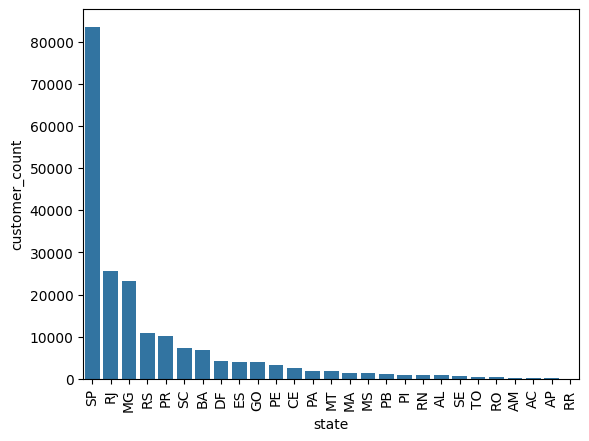

In [3]:
# count the number of customers from each state

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import mysql.connector
connection=mysql.connector.connect(host="localhost",
                                   username="root",
                                   password="1818",
                                   database="ecommerce_datasets")
cursor=connection.cursor()

query="""select customer_state, count(customer_id)
from customers group by customer_state"""
cursor.execute(query)
data=cursor.fetchall()
df=pd.DataFrame(data,columns=["state","customer_count"])
df=df.sort_values(by="customer_count",ascending=False)
print(df)
sb.barplot(data=df,x="state",y="customer_count")
plt.xticks(rotation=90)
plt.show()

  month_names  count_no
0        July     12584
1      August     13024
2    February     13456
3        June     12334
4       March     14422
5     January     14538
6         May     13746
7       April     13878
8   September        32
9     October         8


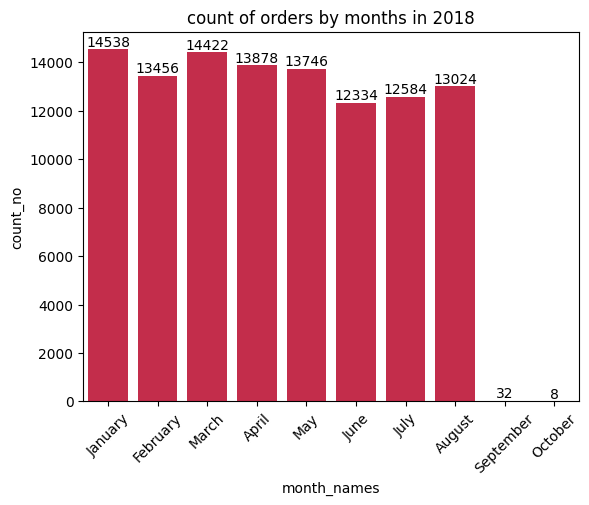

In [6]:
             #INTERMEDIATE QUERIES
#calculate the number of orders per month in 2018

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import mysql.connector
connection=mysql.connector.connect(host="localhost",
                                   username="root",
                                   password="1818",
                                   database="ecommerce_datasets")
cursor=connection.cursor()

query="""select monthname(order_purchase_timestamp) months,count(order_id) order_count
from orders where year(order_purchase_timestamp)=2018
group by months"""
cursor.execute(query)
data=cursor.fetchall()
df=pd.DataFrame(data,columns=["month_names","count_no"])
print(df)
order=["January","February","March","April","May","June","July","August","September","October"]
a=sb.barplot(data=df,x="month_names",y="count_no",order=order,color="crimson")
plt.xticks(rotation=45)
a.bar_label(a.containers[0])
plt.title("count of orders by months in 2018")
plt.show()

        cutomer_city average_products/order
0     padre carvalho                  42.00
1        celso ramos                  39.00
2              datas                  36.00
3      candido godoi                  36.00
4     matias olimpio                  30.00
...              ...                    ...
4105          tuiuti                   6.00
4106  aurora do para                   6.00
4107    nova america                   6.00
4108    tibau do sul                   6.00
4109  lagoa da canoa                   6.00

[4110 rows x 2 columns]


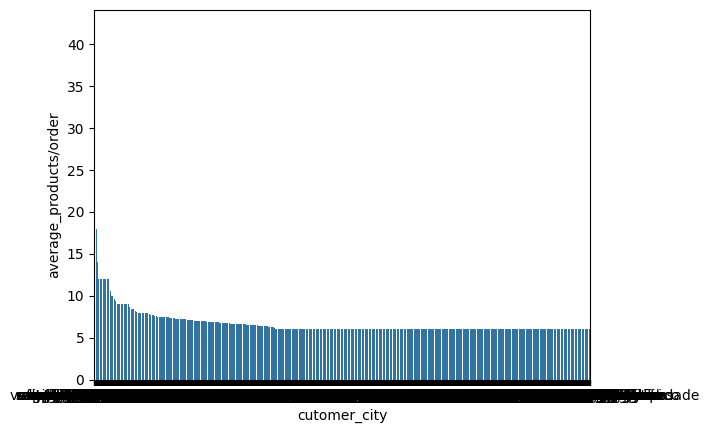

In [7]:
 #find the average number of products per order, grouped by customer city

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import mysql.connector
connection=mysql.connector.connect(host="localhost",
                                   username="root",
                                   password="1818",
                                   database="ecommerce_datasets")
cursor=connection.cursor()

query="""with count_per_order as 
(select orders.order_id,orders.customer_id, count(order_items.order_id)as oc
from orders join order_items
on orders.order_id=order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),2) average_orders
from customers join count_per_order
on customers.customer_id=count_per_order.customer_id
group by customers.customer_city order by average_orders desc"""
cursor.execute(query)
data=cursor.fetchall()
df=pd.DataFrame(data,columns=["cutomer_city","average_products/order"])
print(df)
sb.barplot(data=df,x="cutomer_city",y="average_products/order")
plt.show()

                       category  percentage_distribution
0                BED TABLE BATH                    64.19
1                 HEALTH BEAUTY                    62.12
2          COMPUTER ACCESSORIES                    59.42
3          FURNITURE DECORATION                    53.60
4               WATCHES PRESENT                    53.57
..                          ...                      ...
69                     PC GAMER                     0.08
70              HOUSE COMFORT 2                     0.06
71               CDS MUSIC DVDS                     0.04
72  FASHION CHILDREN'S CLOTHING                     0.03
73       INSURANCE AND SERVICES                     0.01

[74 rows x 2 columns]


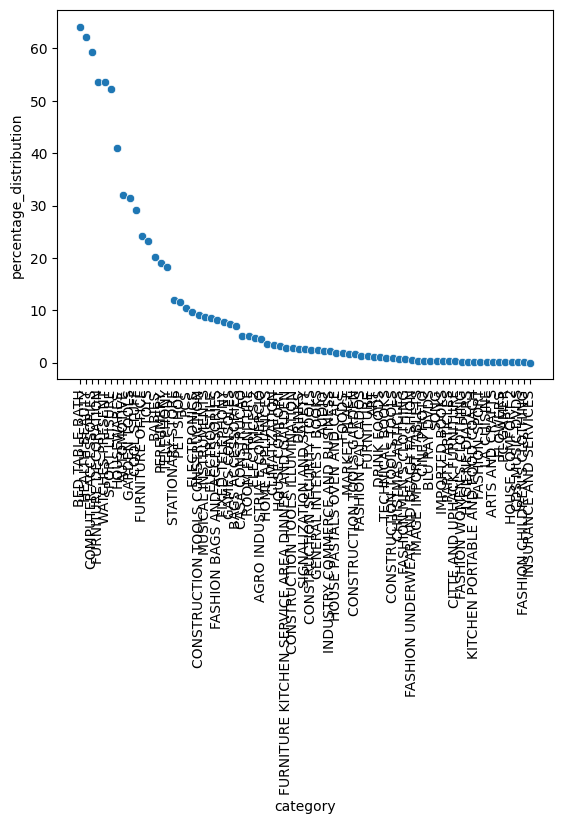

In [6]:
#calculate the percentage of total revenue contributed by each product category

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import mysql.connector
connection=mysql.connector.connect(host="localhost",
                                   username="root",
                                   password="1818",
                                   database="ecommerce_datasets")
cursor=connection.cursor()

query="""select upper(products.product_category) category,
round((sum(payments.payment_value)/(select sum(payment_value)from payments))*100,2) sales_percentage
from products join order_items on
products.product_id=order_items.product_id
join payments on
payments.order_id=order_items.order_id
group by category order by sales_percentage desc"""
cursor.execute(query)
data=cursor.fetchall()
df=pd.DataFrame(data,columns=["category","percentage_distribution"])
print(df)

sb.scatterplot(data=df,x="category",y="percentage_distribution")
plt.xticks(rotation=90)
plt.show()


                           Category  order_count   price
0                     HEALTH BEAUTY        58020  130.16
1                     sport leisure        51846  114.34
2                        Cool Stuff        22776  167.36
3              computer accessories        46962  116.51
4                   Watches present        35946  201.14
..                              ...          ...     ...
69                          flowers          198   33.64
70  Kitchen portable and food coach           90  264.57
71       CITTE AND UPHACK FURNITURE          228  114.95
72                  House Comfort 2          180   25.34
73                   cds music dvds           84   52.14

[74 rows x 3 columns]
[[ 1.         -0.10631514]
 [-0.10631514  1.        ]]


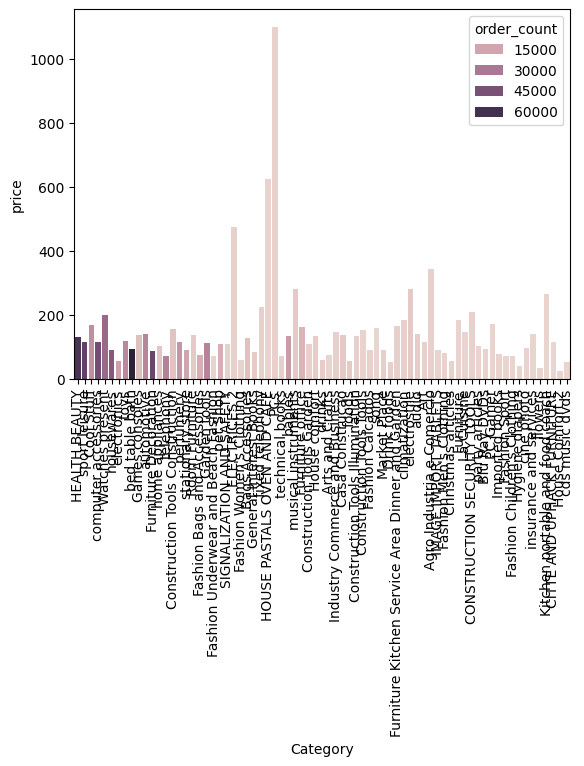

In [9]:
#identify the correlation b/w product price and the number of times a product has been purchased

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import mysql.connector
connection=mysql.connector.connect(host="localhost",
                                   username="root",
                                   password="1818",
                                   database="ecommerce_datasets")
cursor=connection.cursor()

query="""select products.product_category,
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items on
products.product_id=order_items.product_id
group by products.product_category"""
cursor.execute(query)
data=cursor.fetchall()
df=pd.DataFrame(data,columns=["Category","order_count","price"])
print(df)

arr1=df["order_count"]
arr2=df["price"]
print(np.corrcoef([arr1,arr2]))#close to zero no relation

sb.barplot(data=df,x="Category",y="price",hue="order_count")
plt.xticks(rotation=90)
plt.show()

                             seller_id       revenue  rank
0     7c67e1448b00f6e969d365cea6b010ab  4.564502e+06     1
1     1025f0e2d44d7041d6cf58b6550e0bfa  2.773998e+06     2
2     4a3ca9315b744ce9f8e9374361493884  2.711207e+06     3
3     1f50f920176fa81dab994f9023523100  2.612281e+06     4
4     53243585a1d6dc2643021fd1853d8905  2.564128e+06     5
...                                ...           ...   ...
3090  ad14615bdd492b01b0d97922e87cb87f  1.728900e+02  3082
3091  702835e4b785b67a084280efca355756  1.670400e+02  3083
3092  4965a7002cca77301c82d3f91b82e1a9  1.472400e+02  3084
3093  77128dec4bec4878c37ab7d6169d6f26  1.369800e+02  3085
3094  cf6f6bc4df3999b9c6440f124fb2f687  1.099800e+02  3086

[3095 rows x 3 columns]


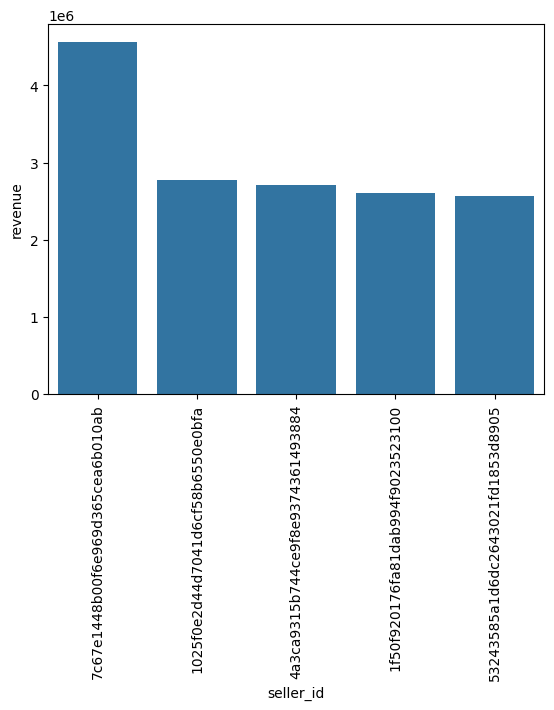

In [20]:
#calculate the total revenue generated by each seller and rank them by revenue 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import mysql.connector
connection=mysql.connector.connect(host="localhost",
                                   username="root",
                                   password="1818",
                                   database="ecommerce_datasets")
cursor=connection.cursor()

query="""select *, dense_rank() over(order by revenue desc) as rn from 
(select order_items.seller_id, sum(payments.payment_value)
revenue from order_items join payments
on order_items.order_id=payments.order_id
group by order_items.seller_id) as a"""
cursor.execute(query)
data=cursor.fetchall()
df=pd.DataFrame(data,columns=["seller_id","revenue","rank"])
print(df)
plt.xticks(rotation=90)
sb.barplot(data=df.head(),x="seller_id",y="revenue")
plt.show()

In [25]:
#advance queries
#calculate the moving average of ordeer values for each customer over their order history 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import mysql.connector
connection=mysql.connector.connect(host="localhost",
                                   username="root",
                                   password="1818",
                                   database="ecommerce_datasets")
cursor=connection.cursor()

query="""select customer_id, order_purchase_timestamp, payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp,
payments.payment_value as payment
from payments join orders
on payments.order_id=orders.order_id) as a"""
cursor.execute(query)
data=cursor.fetchall()
df=pd.DataFrame(data,columns=["order_id","timestamp","price","moving_price"])
print(df)

                                order_id            timestamp   price  \
0       00012a2ce6f8dcda20d059ce98491703  2017-11-14 16:08:26  114.74   
1       00012a2ce6f8dcda20d059ce98491703  2017-11-14 16:08:26  114.74   
2       00012a2ce6f8dcda20d059ce98491703  2017-11-14 16:08:26  114.74   
3       00012a2ce6f8dcda20d059ce98491703  2017-11-14 16:08:26  114.74   
4       00012a2ce6f8dcda20d059ce98491703  2017-11-14 16:08:26  114.74   
...                                  ...                  ...     ...   
623311  ffffe8b65bbe3087b653a978c870db99  2017-09-29 14:07:03   18.37   
623312  ffffe8b65bbe3087b653a978c870db99  2017-09-29 14:07:03   18.37   
623313  ffffe8b65bbe3087b653a978c870db99  2017-09-29 14:07:03   18.37   
623314  ffffe8b65bbe3087b653a978c870db99  2017-09-29 14:07:03   18.37   
623315  ffffe8b65bbe3087b653a978c870db99  2017-09-29 14:07:03   18.37   

        moving_price  
0         114.739998  
1         114.739998  
2         114.739998  
3         114.739998  
4       

In [30]:
#calculate the cumulative sales per month for each year 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import mysql.connector
connection=mysql.connector.connect(host="localhost",
                                   username="root",
                                   password="1818",
                                   database="ecommerce_datasets")
cursor=connection.cursor()

query="""select years, months, payment, sum(payment)
over(order by years, months) cumulative_sales from
(Select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),0) as payment from orders join payments
on orders.order_id=payments.order_id
group by years, months order by years, months) as a"""
cursor.execute(query)
data=cursor.fetchall()
df=pd.DataFrame(data,columns=["years","monts","sales","cumulative_sales"])
df

,years,monts,sales,cumulative_sales
0,2016,9,1513.0,1513.0
1,2016,10,354543.0,356056.0
2,2016,12,118.0,356174.0
3,2017,1,830928.0,1187102.0
4,2017,2,1751448.0,2938550.0
5,2017,3,2699182.0,5637732.0
6,2017,4,2506728.0,8144460.0
7,2017,5,3557513.0,11701973.0
8,2017,6,3067658.0,14769631.0
9,2017,7,3554298.0,18323929.0


In [36]:
#calculate the year over year growth rate of total sales

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import mysql.connector
connection=mysql.connector.connect(host="localhost",
                                   username="root",
                                   password="1818",
                                   database="ecommerce_datasets")
cursor=connection.cursor()

query="""with a as(Select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id=payments.order_id
group by years order by years)

select years, ((payment - lag(payment,1) over(order by years))/
lag(payment,1) over(order by years))*100 from a"""
cursor.execute(query)
data=cursor.fetchall()
df=pd.DataFrame(data,columns=["years","year_over_yearGrowth"])
df


,years,year_over_yearGrowth
0,2016,NaN
1,2017,12112.703759
2,2018,20.000924


In [43]:
#calculate the rate of customers, defined as the percentage of customers 
#who make another purchase within 6 months of their first purchase

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import mysql.connector
connection=mysql.connector.connect(host="localhost",
                                   username="root",
                                   password="1818",
                                   database="ecommerce_datasets")
cursor=connection.cursor()

query="""with a as(select customers.customer_id,
min(orders.order_purchase_timestamp) as first_order
from customers join orders
on customers. customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id, count(distinct order_purchase_timestamp)as next_order
from a join orders
on orders.customer_id=a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < 
date_add(first_order, interval 6 month)
group by a.customer_id)

select 100 * count(distinct a.customer_id) / count(distinct b.customer_id) as percentage
from a left join b
on a.customer_id=b.customer_id"""
cursor.execute(query)
data=cursor.fetchall()
df=pd.DataFrame(data)
df
#no cutomers will repeat purchase in 6 months

,0
0,None


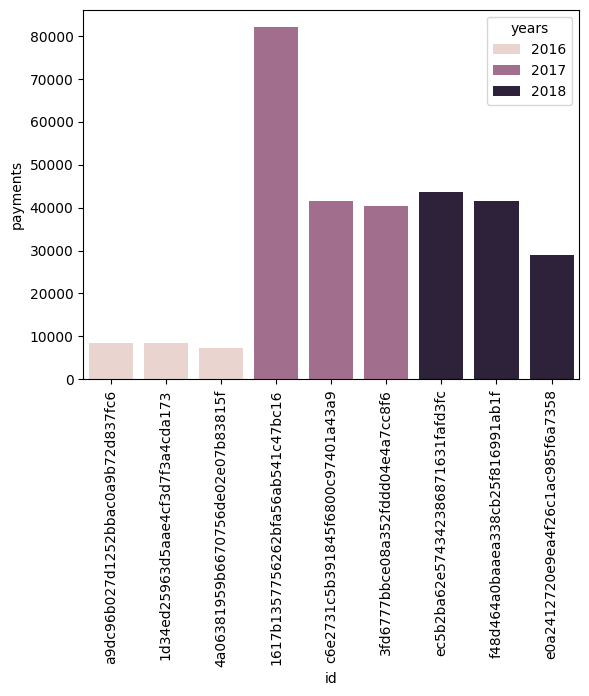

In [51]:
#identify the top 3 customers who spent the most money in each year

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import mysql.connector
connection=mysql.connector.connect(host="localhost",
                                   username="root",
                                   password="1818",
                                   database="ecommerce_datasets")
cursor=connection.cursor()

query="""select years, customer_id, payment, d_rank
from
(select year(orders.order_purchase_timestamp)years,
orders.customer_id,
sum(payments.payment_value)payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc)d_rank
from orders join payments
on payments.order_id=orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id)as a
where d_rank <=3"""
cursor.execute(query)
data=cursor.fetchall()
df=pd.DataFrame(data,columns=["years","id","payments","rank"])
df
sb.barplot(data=df,x="id",y="payments",hue="years")
plt.xticks(rotation=90)
plt.show()